170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.2801 - loss: 1.9166 - val_accuracy: 0.4955 - val_loss: 1.3948
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.5101 - loss: 1.3598 - val_accuracy: 0.5788 - val_loss: 1.1577
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.5775 - loss: 1.1993 - val_accuracy: 0.6258 - val_loss: 1.0564
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.6224 - loss: 1.0896 - val_accuracy: 0.6655 - val_loss: 0.9578
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6560 - loss: 0.9882 - val_accuracy: 0.6787 - val_loss: 0.9187
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6898 - loss: 0.8998 - val_accuracy: 0.6945 - val_loss: 0.8764
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.7019 - loss: 0.8434 - val_accuracy: 0.6990 - val_loss: 0.8638
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.7247 - loss: 0.7993 - 

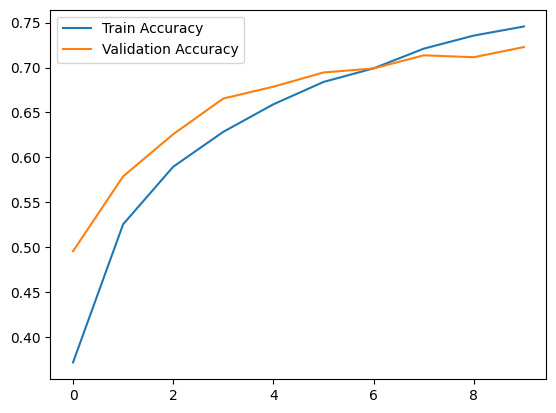

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7226 - loss: 0.8036


Test Accuracy: 0.7228


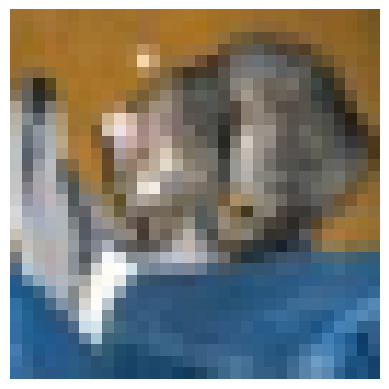

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Class: cat


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model
model.save("cifar10_cnn.h5")

# Load and Predict on a Sample Image
def predict_image(img_index, model):
    img = x_test[img_index]  # Select an image from the test set
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)

    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck']
    return class_labels[predicted_class]

# Test the prediction function
print("Predicted Class:", predict_image(0, model))